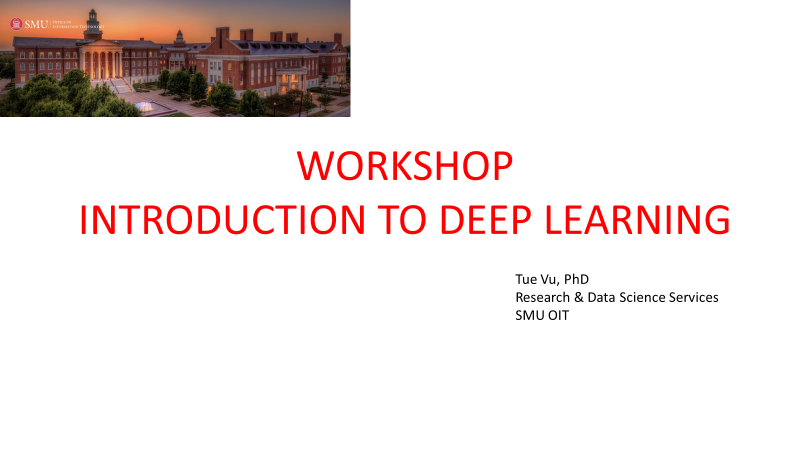

# 1. Deep Learning Regression Model with Keras


### Load data

In [ ]:
import pandas as pd
import numpy as np

# Let use the california housing data in Machine Learning class:
    
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

# Predictors/Input:
X = pd.DataFrame(data.data,columns=data.feature_names)

# Predictand/output:
y = pd.DataFrame(data.target,columns=data.target_names)

print(X.head())
print(y.head())


### Split model into training & testing set with 60% for training:
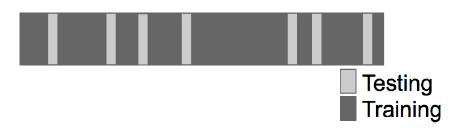

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6,random_state=123)

### Visualize the heat map:

In [ ]:
import seaborn as sns
df = pd.concat([X_train,y_train], axis=1)
sns.pairplot(df)

### Normalize the input data for training & testing set

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled  = scaler.fit_transform(X_test)

### Create Keras's Sequential model with Dense layers


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### Create 2 hidden layers with 20 and 10 hidden nodes each and 1 output layer with Keras:

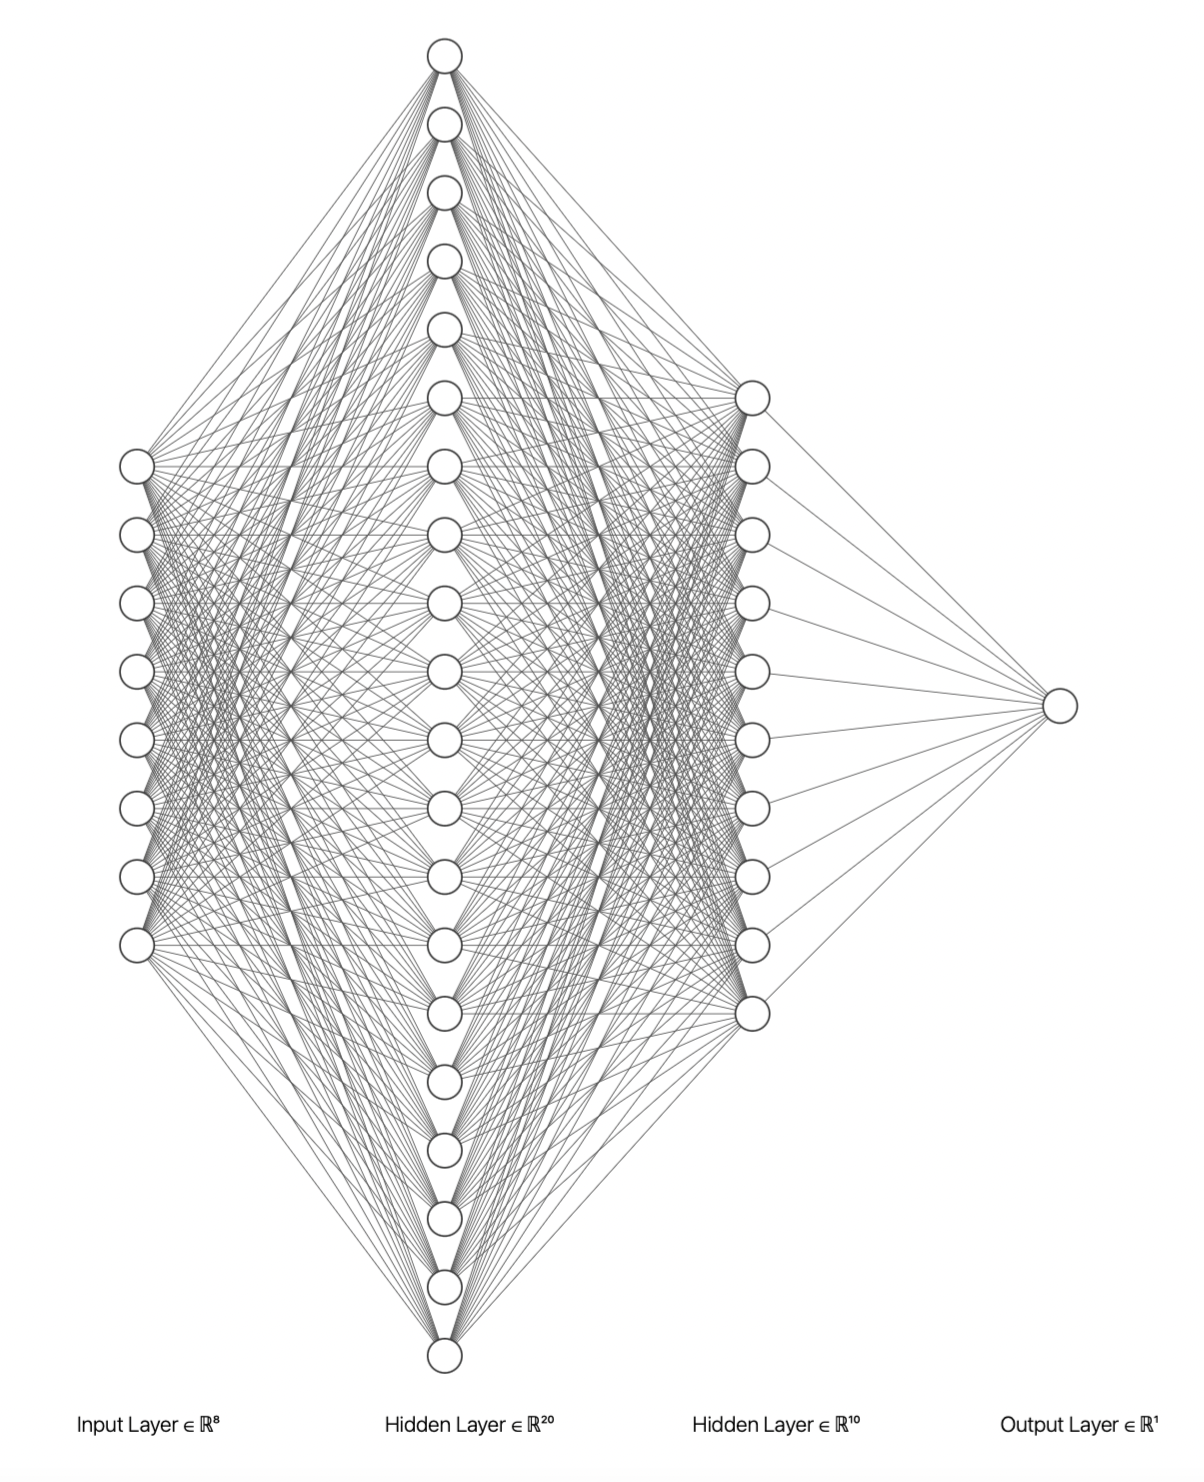

plot created by: http://alexlenail.me/NN-SVG/index.html

In [ ]:
# Create a Sequential model
model = Sequential()

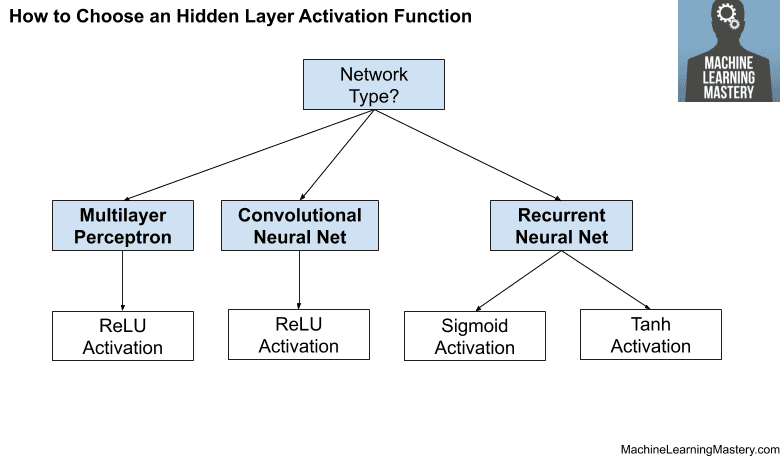

In [ ]:
# Create a first hidden layer, the input for the first hidden layer is input layer which has 8 variables:
model.add(Dense(20, activation='relu', input_shape=(8,)))
# Create a second hidden layer
model.add(Dense(10, activation='relu'))

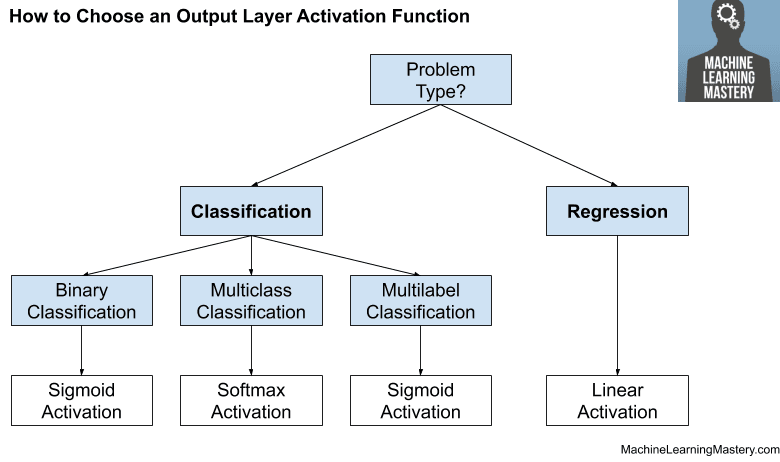

In [ ]:
# Create an output layer with only 1 variable, for regression model, the linear activation is used without adding the flag for activation
model.add(Dense(1))

### Summary of model

In [ ]:
model.summary()

### Compile model

In [ ]:
model.compile(optimizer='SGD', loss='mean_squared_error')


Here, **adam** optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

More information on **adam** optimizer is [here](https://keras.io/api/optimizers/adam/)

In addition to **adam**, there are many other optimizer:
- [SGD](https://keras.io/api/optimizers/sgd)
- [RMSprop](https://keras.io/api/optimizers/rmsprop)
- [Adadelta](https://keras.io/api/optimizers/adadelta)
- [Adagrad](https://keras.io/api/optimizers/adagrad)
- [Adamax](https://keras.io/api/optimizers/adamax)
- [Nadam](https://keras.io/api/optimizers/nadam)
- [Ftrl](https://keras.io/api/optimizers/ftrl)

There are also many other **loss** function. 

The purpose of **loss** functions is to compute the quantity that a model should seek to minimize during training. Detail can be found [here](https://keras.io/api/losses/)

### Fit model
epoch: the number of time that model is completely trained with whole data

verbose: 0: nothing; 1: progress bar; 2: number only

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100, verbose=2,
               validation_data=(X_test_scaled,y_test))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],"b-o")
plt.plot(history.history['val_loss'],"r-d")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.tight_layout()

### Evaluate model output

In [ ]:
results = model.evaluate(X_test_scaled, y_test, verbose=1)
print("test loss:", results)

### Predict output

In [ ]:
from sklearn import metrics
y_pred = model.predict(X_test_scaled)
metrics.r2_score(y_test,y_pred)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)

plt.title('Predicting house price')
plt.xlabel('observed (hundred thousand $)')
plt.ylabel('predictions (hundred thousand $)')

The outcome of Deep Learning is not as good as Machine Learning (Using Random Forest, we can achieve the R2 of 0.8).

It's not always the case that Deep Learning is better than Machine Learning, why?

Refer to our material in ppt:

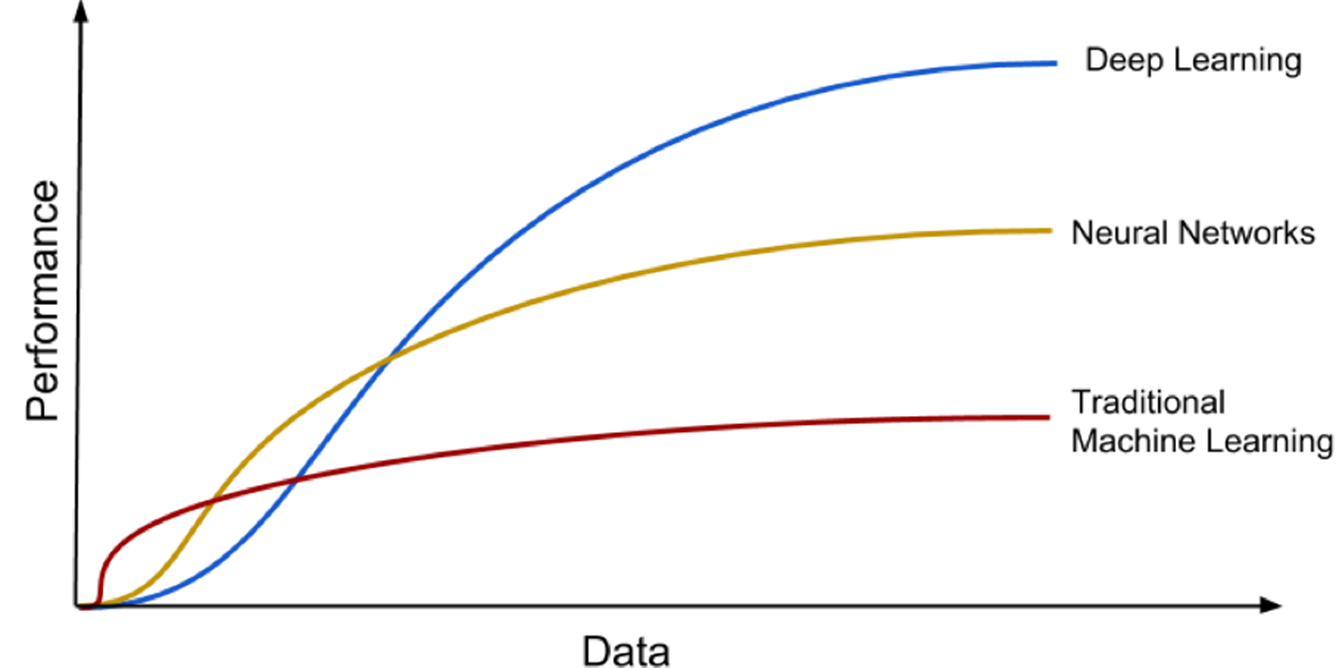

### Save and load keras model

In [ ]:
from tensorflow.keras.models import load_model

model.save('my_model_regression.keras')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model_regression.keras')

# 2. Deep Learning Classification model with Keras

## Data sets
Here we use [Iris plant](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) data for multiple (3) output.


In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

print("There are", X.shape[1], " Predictors: ", data.feature_names)
print("The output has 3 values: ", data.target_names)
print("Total size of data is ", X.shape[0], " rows")

## Apply One Hot Encoding to categorize the output:
- One Hot Encoding allows to represent the categorical data in a probabilistic way that is understandable by the machine.
- For example **setosa, versicolor, virginica** can be converted to **0, 1, 2** or **[1 0 0,0 1 0,0 0 1]**


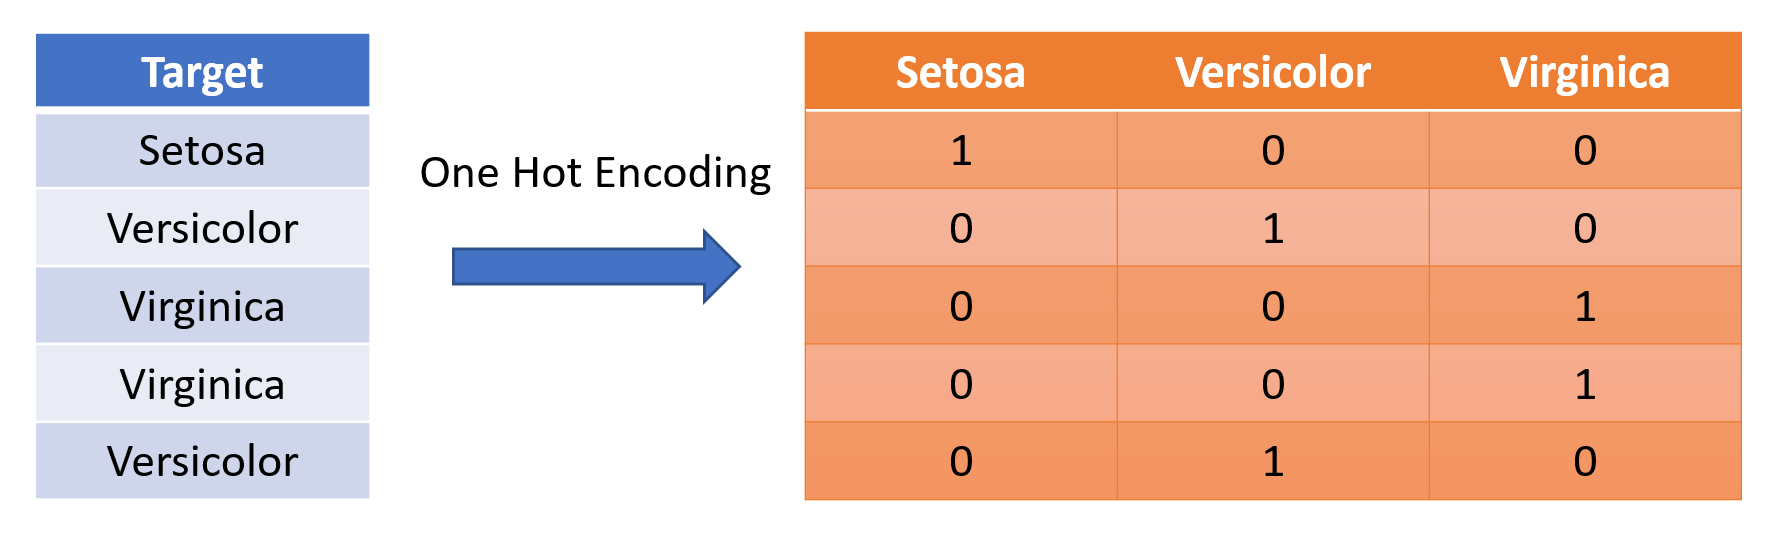

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

## Partitioning Data to train/test:


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.6, random_state=123)

## Normalize training/testing input data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Create Keras's Sequential model with Dense layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Create 2 hidden layers with 20 and 10 hidden nodes each and 3 output layer with Keras:

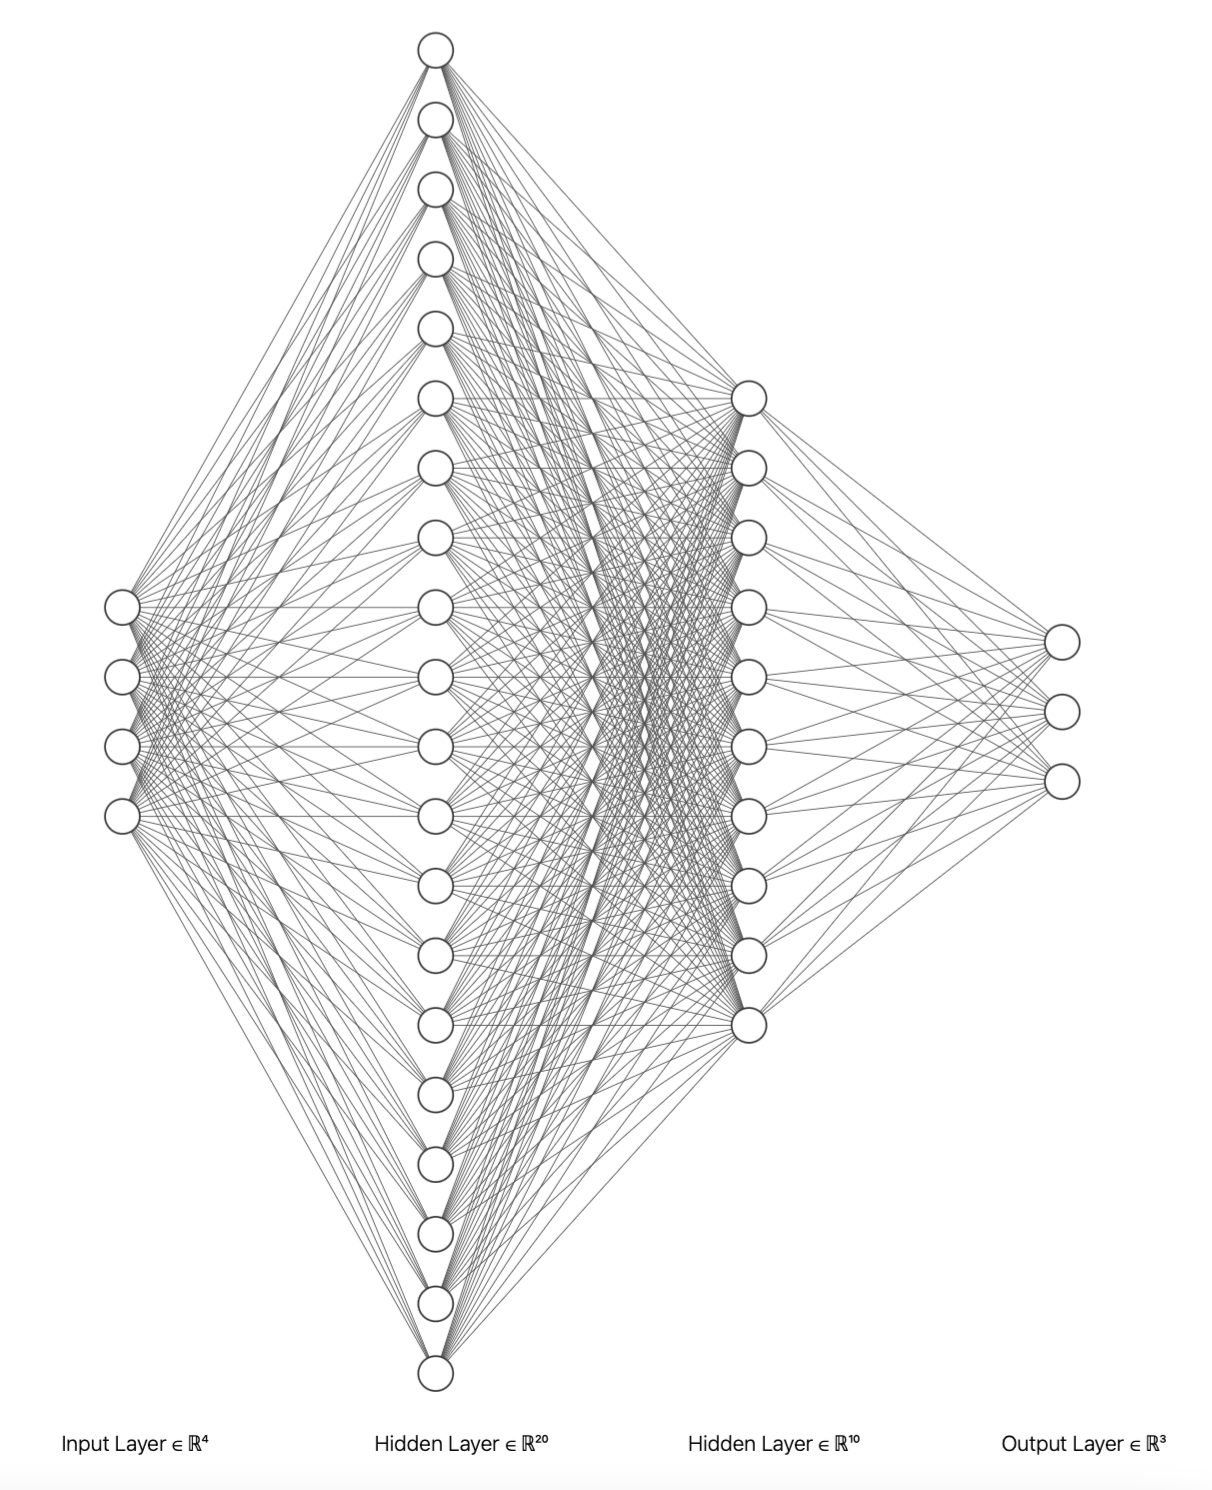

In [ ]:
# Create a Sequential model
model = Sequential()
# Create a first hidden layer, the input for the first hidden layer is input layer which has 3 variables:
model.add(Dense(20, activation='relu', input_shape=(4,)))
# Create a second hidden layer
model.add(Dense(10, activation='relu'))
# Create an output layer with only 3 variables:
model.add(Dense(3,activation='softmax'))

### Summary of model

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics='accuracy')


In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100, verbose=1,
               validation_data=(X_test_scaled,y_test))


### Evaluate model
Evaluate the testing set using given loss function

In [ ]:
results = model.evaluate(X_test_scaled, y_test, verbose=1)
print("test loss, test acc:", results)

### Predict output

In [ ]:
y_pred = model.predict(X_test_scaled)

### Inverse transform the One Hot Encoding


In [ ]:
Y_pred = enc.inverse_transform(y_pred)
Y_test = enc.inverse_transform(y_test)

### Evaluate using accuracy score:


In [ ]:
from sklearn import metrics
metrics.accuracy_score(Y_pred,Y_test)

# 3. Deep Learning with Image as input data - a Classification model

## The MNIST dataset - Modified National Institute of Standards and Technology dataset

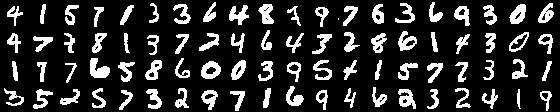

The MNIST database of handwritten digits from 0 to 9, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image of 28 x 28 pixel.

The MNIST database of handwritten digits problem is considered the "Hello World" of deep learning: to correctly classify hand-written digits.


## Objectives

* Understand how deep learning can solve problems traditional programming methods cannot
* Learn about the [MNSIT handwritten digits dataset](http://yann.lecun.com/exdb/mnist/)
* Use the [Keras API](https://keras.io/) to load the MNIST dataset and prepare it for training
* Create a simple neural network to perform image classification
* Train the neural network 
* Observe the performance of the trained neural network

## Load MNIST data

In [ ]:
from tensorflow.keras.datasets import mnist

## Split to training & testing


In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
X_train[0].shape

## Render the image using Matplotlib

In [ ]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.imshow(X_train[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    plt.title(["Corresponding target ", y_train[i]])
    plt.show()

## Prepare data

In deep learning, it is common that data needs to be transformed to be in the ideal state for training. For this particular image classification problem, there are 3 tasks we should perform with the data in preparation for training:

1. Flatten the image data, to simplify the image input into the model
2. Normalize the image data, to make the image input values easier to work with for the model
3. Categorize the labels, to make the label values easier to work with for the model

### 1. Flatten the image data

We are going to reshape each 24 bit RGB image into a single array of 28*28 = 784 continous pixels (flattening process)

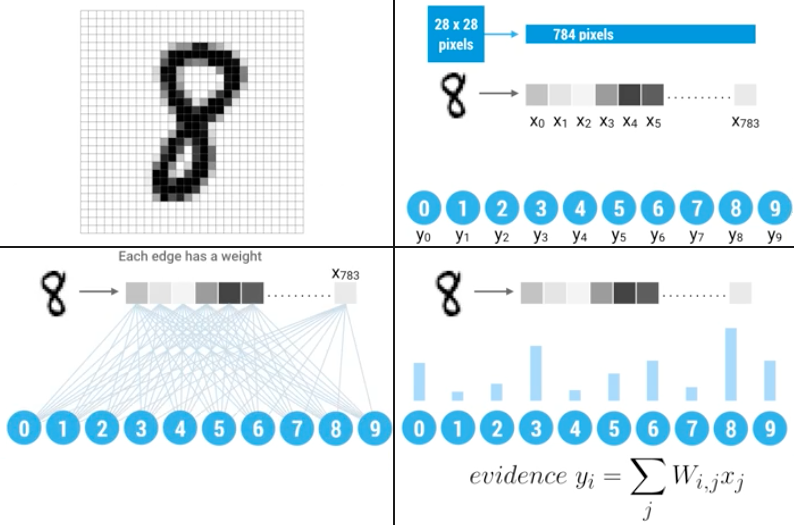

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test  = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [ ]:
print(X_train.shape)
print(X_test.shape)

### 2. Normalize the image data

In [ ]:
print(X_train.max())
print(X_test.max())

In [ ]:
X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

### 3. Categorical Encoding
For all kinds of classification it's always better to classify output into categorical encoding, so the number classification would be the same as image of other type classification (car, animal, machine)

(Similar to iris problem above)

Here we utilize the Keras's utility [categorically encode values](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) named **utils.to_categorical**

In [ ]:
import tensorflow.keras as keras
num_categories = 10 # Ranges from 0-9

y_train = keras.utils.to_categorical(y_train,num_categories)
y_test = keras.utils.to_categorical(y_test,num_categories)

## Create Keras Sequential model with Dense Layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Create 2 hidden layers with 512 and 512 hidden nodes each and 10 output layer with Keras:

In [ ]:
# Create a Sequential model
model = Sequential()
# Create a first hidden layer, the input for the first hidden layer is input layer which has 3 variables:
model.add(Dense(units=512,activation='relu',input_shape=(784,)))
# Create a second hidden layer
model.add(Dense(units=512,activation='relu'))
# Create an output layer with only 3 variables:
model.add(Dense(units = num_categories,activation='softmax'))

### Sumarizing the model

In [ ]:
model.summary()

### Compile model

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

### Train model

using 3 epochs only

In [ ]:
model.fit(X_train,y_train,epochs=3,verbose=1,validation_data=(X_test,y_test))

In [ ]:
score = model.evaluate(X_test,y_test)

In [ ]:
y_predict = model.predict(X_test)

### Double check

In [ ]:
import numpy as np
for i in range(20,30):
    plt.imshow(X_test[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    plt.title(["predicted as ", np.argmax(y_predict[i])])
    plt.show()

# 4. Exercise: Apply Deep Learning to classify Fashion MNIST data

[Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/)  is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

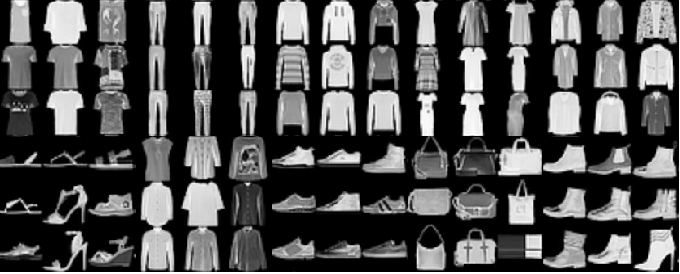

The classes are:


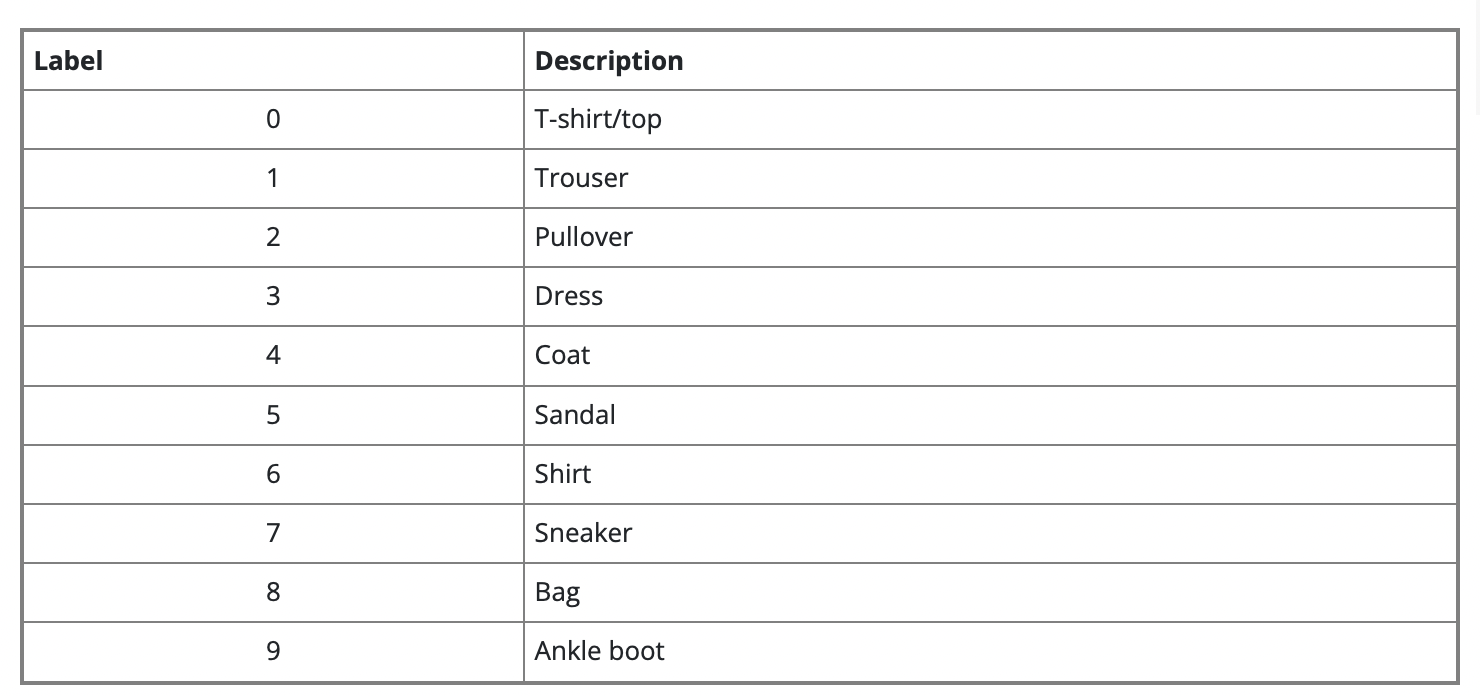

## Load Fashion MNIST data:


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

## Split to Training & testing:

In [ ]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [ ]:
## Visualize the first 10 images:

In [ ]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.imshow(X_train[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])
    plt.show()